In [1]:
import pandas as pd
digimon = pd.read_csv('Portofolio4/DigiDB_digimonlist.csv')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import graphviz
import numpy as np

In [2]:
digimon_train, digimon_test = train_test_split(digimon, test_size=0.3, random_state=42, stratify=digimon['Stage'])
print(digimon_train.shape, digimon_test.shape)

(174, 13) (75, 13)


In [3]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [4]:
digimon.corr()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Number,1.000000,0.923339,0.571901,0.626166,0.608113,0.552471,0.620177,0.560146,0.762861
Memory,0.923339,1.000000,0.355176,0.639569,0.623400,0.608372,0.611728,0.583956,0.797777
Equip Slots,0.571901,0.355176,1.000000,0.392137,0.278687,0.211450,0.466534,0.237616,0.286558
Lv 50 HP,0.626166,0.639569,0.392137,1.000000,0.070957,0.605708,0.561376,0.055314,0.317051
Lv50 SP,0.608113,0.623400,0.278687,0.070957,1.000000,-0.148365,0.169960,0.895652,0.603240
Lv50 Atk,0.552471,0.608372,0.211450,0.605708,-0.148365,1.000000,0.426901,-0.186125,0.522005
Lv50 Def,0.620177,0.611728,0.466534,0.561376,0.169960,0.426901,1.000000,0.182606,0.225921
Lv50 Int,0.560146,0.583956,0.237616,0.055314,0.895652,-0.186125,0.182606,1.000000,0.442214
Lv50 Spd,0.762861,0.797777,0.286558,0.317051,0.603240,0.522005,0.225921,0.442214,1.000000


In [47]:
features= ['Lv50 SP', 'Lv 50 HP', 'Lv50 Atk']
dt_regression = DecisionTreeRegressor(max_depth = 10)
dt_regression.fit(digimon_train[features], digimon_train['Lv50 Int'])

DecisionTreeRegressor(max_depth=10)

In [48]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [49]:
predictionsOnTrainset = dt_regression.predict(digimon_train[features])
predictionsOnTestset = dt_regression.predict(digimon_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, digimon_train['Lv50 Int'])
rmseTest = calculate_rmse(predictionsOnTestset, digimon_test['Lv50 Int'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1.0315891843222902
RMSE on test set 18.150461681710997


In [50]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

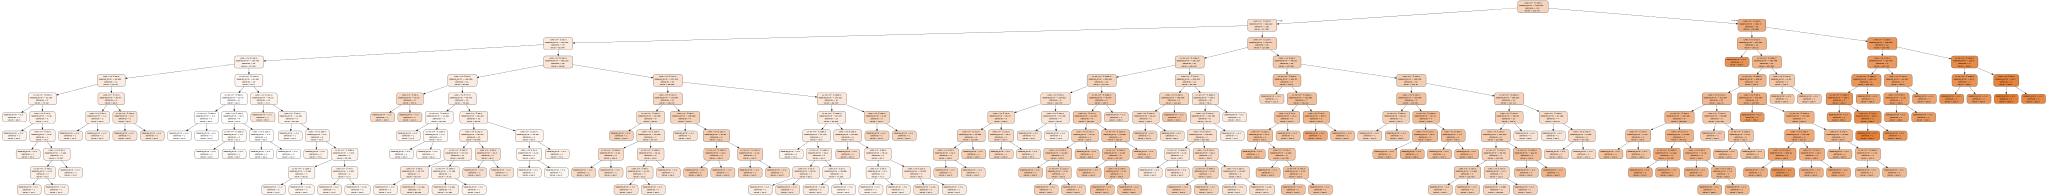

In [51]:
plot_tree_regression(dt_regression, features)